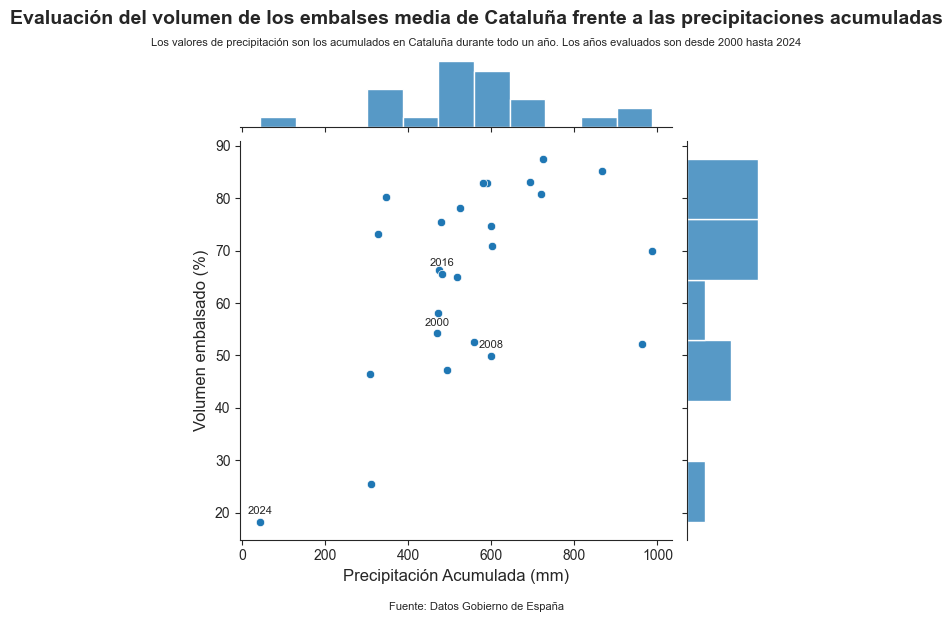

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

# Leer los datos del archivo CSV
df = pd.read_csv('download.csv', encoding='latin-1')

# Convertir la columna de FECHA a tipo datetime
df2 = pd.read_csv('gn9e-3qhr_version_649.csv')
df2['dia'] = pd.to_datetime(df2['dia'])
df2['dia'] = df2['dia'].dt.year
media_porcentaje_llenado = df2.groupby([df2['dia'], 'estaci'])['percentatge_volum_embassat'].mean()

# Si deseas obtener un nuevo DataFrame con estos resultados
nuevo_df = media_porcentaje_llenado.reset_index()
nuevo_df2 = nuevo_df.groupby([nuevo_df['dia']])['percentatge_volum_embassat'].mean()

merged_df = pd.merge(df, nuevo_df2, left_on='Año', right_on='dia', how='inner')

joint_plot = sns.jointplot(x=merged_df["Precipitación Acumulada"], y=merged_df["percentatge_volum_embassat"], kind='scatter')

# Añadir título y subtítulo
plt.subplots_adjust(top=0.9)  # Ajustar la posición del título
joint_plot.fig.suptitle("Evaluación del volumen de los embalses media de Cataluña frente a las precipitaciones acumuladas", fontsize=14, fontweight='bold')
joint_plot.ax_joint.set_xlabel("Precipitación Acumulada (mm)", fontsize=12)
joint_plot.ax_joint.set_ylabel("Volumen embalsado (%)", fontsize=12)
joint_plot.fig.text(x=0.5, y=0.92, s="Los valores de precipitación son los acumulados en Cataluña durante todo un año. Los años evaluados son desde 2000 hasta 2024", fontsize=8, ha='center')
sns.set_style("ticks")

# Agregar texto con los años
for index, row in merged_df.iterrows():
    # Condición para elegir qué puntos mostrar
    if row['Año'] % 8 == 0:  # Por ejemplo, aquí se muestra el año si es par
        joint_plot.ax_joint.text(row["Precipitación Acumulada"], row["percentatge_volum_embassat"] + 1, str(int(row['Año'])), fontsize=8, ha='center', va='bottom')

# Añadir pie de imagen
joint_plot.fig.text(0.5, -0.02, "Fuente: Datos Gobierno de España", ha='center', fontsize=8)

# Mostrar el gráfico
plt.show()

